In [81]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels import api as sm

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.forecasting.stl import STLForecast

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

from warnings import filterwarnings
filterwarnings('ignore')

#### 1. Half-hourly electricity demand for Victoria, Australia is contained in vic_elec

In [15]:
df = pd.read_csv('../data/vic_elec.csv', index_col=[0])

df['Time'] = pd.to_datetime(df['Time']).dt.normalize()

df = df[(df['Time'].dt.year == 2014) & (df['Time'].dt.month == 1)].reset_index(drop=True)

df = df.groupby('Time').agg(demand=('Demand', 'sum'), temp=('Temperature', 'max'))

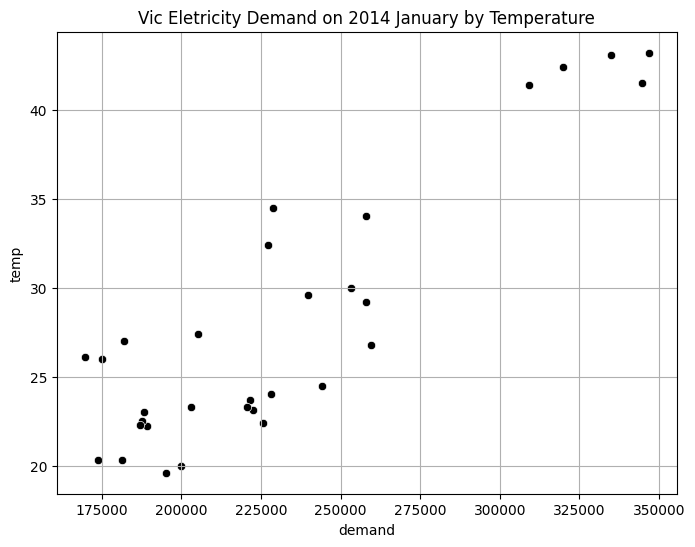

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=df['demand'], y=df['temp'], color='k')
ax.set_title('Vic Eletricity Demand on 2014 January by Temperature');
ax.grid(2);

In [41]:
# Fit Model

ols = sm.OLS(
    df['demand'],
    df['temp']
).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 demand   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2115.
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                    2.22e-29
Time:                        21:05:02   Log-Likelihood:                         -361.48
No. Observations:                  31   AIC:                                      725.0
Df Residuals:                      30   BIC:                                      726.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp        8126.9633    176.696     45.994      0.000    7766.102    8487.824
==============================================================================
Omnibus:                        3.430   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                1.769
Skew:                          -0.280   Prob(JB):                        0.413
Kurtosis:                       1.973   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

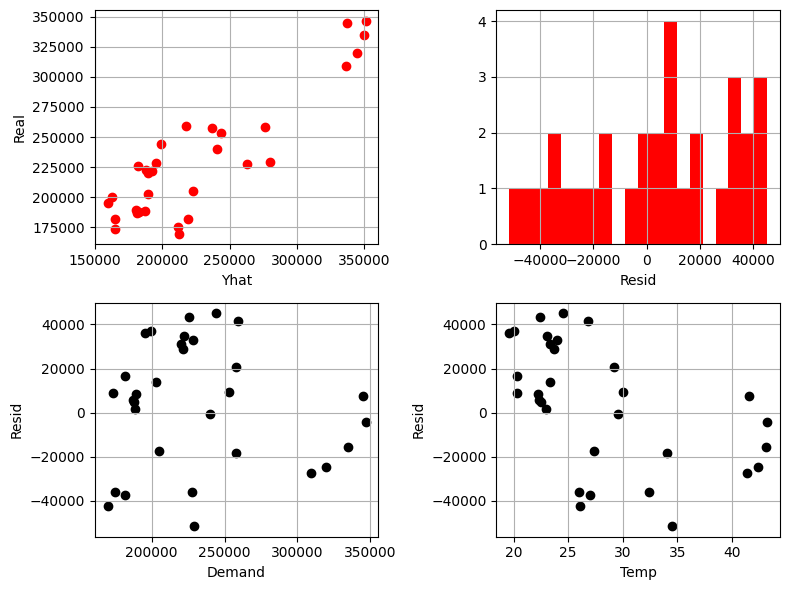

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(8,6))
ax = ax.flatten()
ax[0].scatter(x=ols.predict(), y=df['demand'], color='r')
ax[1].hist(ols.resid, bins=20, color='r')
ax[2].scatter(x=df['demand'], y=ols.resid, color='k')
ax[3].scatter(x=df['temp'], y=ols.resid, color='k')

for axi in ax: axi.grid(2)
ax[0].set_xlabel('Yhat')
ax[0].set_ylabel('Real')
ax[1].set_xlabel('Resid')
ax[2].set_ylabel('Resid')
ax[2].set_xlabel('Demand')
ax[3].set_ylabel('Resid')
ax[3].set_xlabel('Temp')

plt.tight_layout()

In [87]:
temps = [0., 1., 5., 10., 15., 35.]

yhat = ols.predict(temps)

for temp, y in zip(temps, yhat):
    print(f'With Temperature of {temp}, the Demand predicted is {y:.4f}')

With Temperature of 0.0, the Demand predicted is 0.0000
With Temperature of 1.0, the Demand predicted is 8126.9633
With Temperature of 5.0, the Demand predicted is 40634.8164
With Temperature of 10.0, the Demand predicted is 81269.6328
With Temperature of 15.0, the Demand predicted is 121904.4491
With Temperature of 35.0, the Demand predicted is 284443.7147


In [86]:
8126.9633 * 35

284443.7155

In [84]:
40634.8164 + 40634.8164

81269.6328

#### 2. Data set olympic_running contains the winning times (in seconds) in each Olympic Games sprint, middle-distance and long-distance track events from 1896 to 2016.

In [109]:
df = pd.read_csv('../data/olympic_running.csv', index_col=[0])

In [110]:
display(df.isna().sum())

df.dropna(inplace=True)

Year       0
Length     0
Sex        0
Time      31
dtype: int64

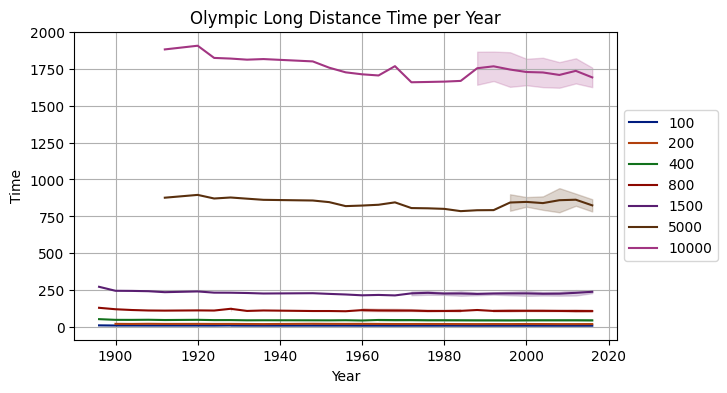

In [111]:
fig, ax = plt.subplots(figsize=(7,4))
sns.lineplot(df, x='Year', y='Time', hue='Length', ax=ax, palette='dark')
ax.set_title('Olympic Long Distance Time per Year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax.grid(2);

In [112]:
ols = sm.OLS(
    df['Time'],
    df['Length']
).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Time   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          7.703e+04
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                        0.00
Time:                        21:45:47   Log-Likelihood:                         -1432.7
No. Observations:                 281   AIC:                                      2867.
Df Residuals:                     280   BIC:                                      2871.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Length         0.1726      0.001    277.548      0.000       0.171       0.174
==============================================================================
Omnibus:                      141.557   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.963
Skew:                           1.991   Prob(JB):                    4.07e-188
Kurtosis:                      10.606   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

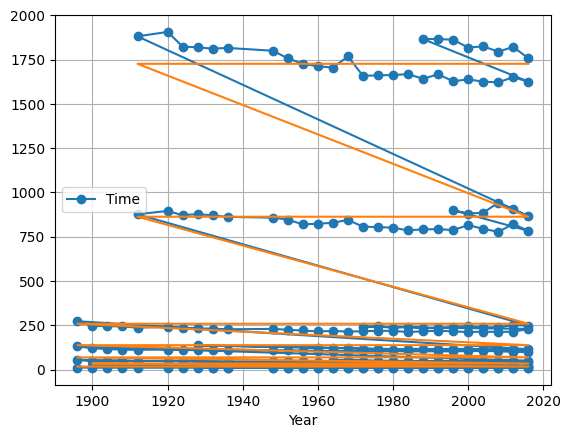

In [123]:
ax = df.plot(x='Year', y='Time', grid=2, marker='o');
ax.plot(df['Year'], ols.predict());

#### 3. An elasticity coefficient is the ratio of the percentage change in the forecast variable (y) to the percentage change in the predictor variable (x). Mathematically, the elasticity is defined as (dy / dx) × ( x / y ) . Consider the log-log model,

#### 4. The data set souvenirs concerns the monthly sales figures of a shop which opened in January 1987 and sells gifts, souvenirs, and novelties. 

In [47]:
df = pd.read_csv('../data/souvenirs.csv', index_col=[0])

df['Month'] = pd.to_datetime(df['Month'], format='%Y %b')

df['Q'] = df.Month.dt.quarter
df['Year'] = df.Month.dt.year
df['MonthIndex'] = df.Month.dt.month

# Log because have high heteroskedasticity and very high values
df['LogSales'] = np.log1p(df['Sales'])

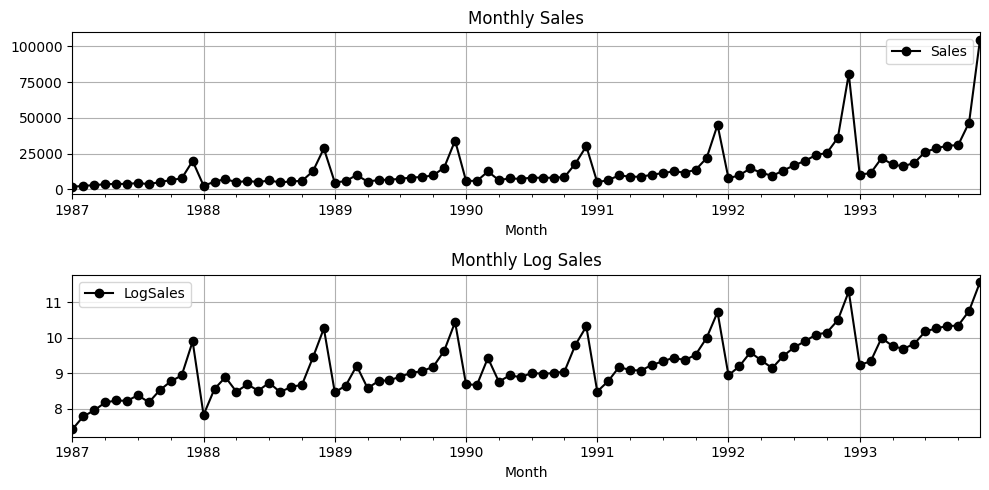

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(10,5))
kargs = {'marker': 'o', 'color': 'k', 'grid': 2}

df.plot(
    x='Month',
    y='Sales',
    title='Monthly Sales',
    ax=ax[0], **kargs
);

df.plot(
    x='Month',
    y='LogSales',
    title='Monthly Log Sales',
    ax=ax[1], **kargs
);

plt.tight_layout()

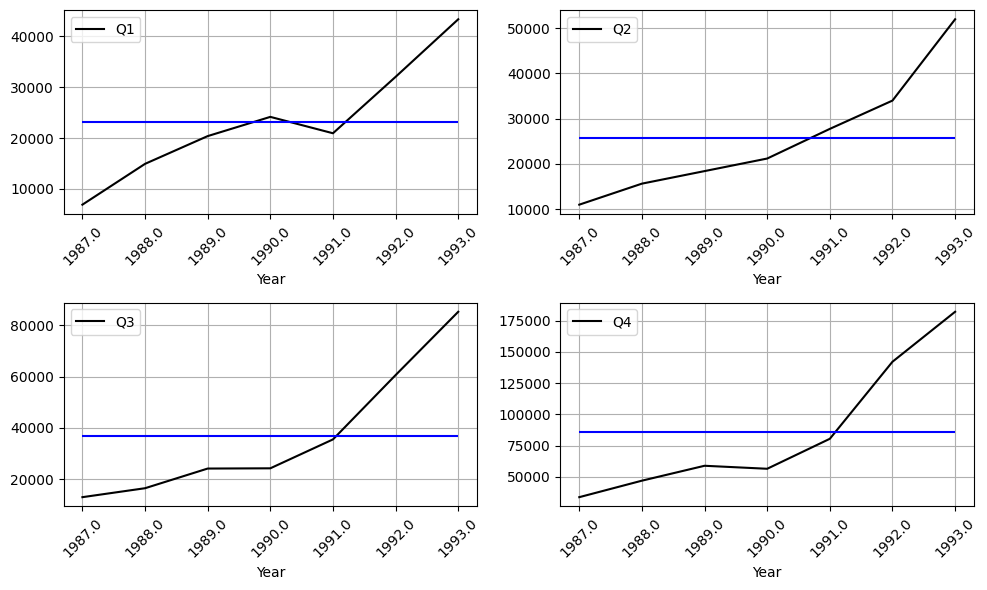

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()

for i, q in enumerate(df['Q'].unique()):
    aux = df.loc[df['Q'] == q, ['Sales', 'Q', 'Year']].groupby(['Year', 'Q']).sum().reset_index()
    axis = aux.plot(
        kind='line', 
        x='Year', y='Sales', 
        label= f'Q{q}', ax=ax[i], color='k', grid='on'
    )
    axis = axis.get_children()[0]
    ax[i].hlines(
        y=np.mean(axis.get_ydata()), 
        xmin=axis.get_xdata()[0], 
        xmax=axis.get_xdata()[-1],
        color='b'
    )
    ax[i].set_xticklabels(ax[i].get_xticks(), rotation = 45)

plt.tight_layout()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               LogSales   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              6178.
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                    1.67e-95
Time:                        22:35:41   Log-Likelihood:                         -77.723
No. Observations:                  84   AIC:                                      161.4
Df Residuals:                      81   BIC:                                      168.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0043   9.33e-05     45.985      0.000       0.004       0.004
MonthIndex     0.2771      0.083      3.336      0.001       0.112       0.442
Q             -0.4486      0.256     -1.749      0.084      -0.959       0.062
==============================================================================
Omnibus:                        2.476   Durbin-Watson:                   0.249
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.581
Skew:                           0.029   Prob(JB):                        0.454
Kurtosis:                       2.330   Cond. No.                     7.89e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

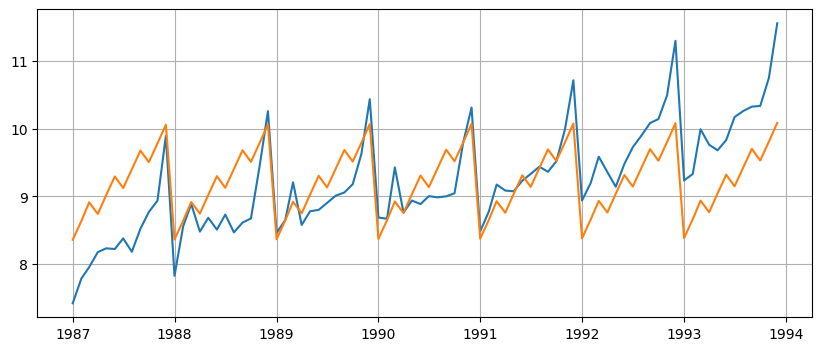

In [77]:
ols = sm.OLS(
    df['LogSales'],
    df[['Year', 'MonthIndex', 'Q']] # Use Year just for apply "Trend Ideia" ?
).fit()

df['Yhat'] = ols.predict()

display(ols.summary())

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Month'], df['LogSales'])
ax.plot(df['Month'], df['Yhat']);
ax.grid(1)

#### 5. The us_gasoline series consists of weekly data for supplies of US finished motor gasoline product, from 2 February 1991 to 20 January 2017. The units are in “million barrels per day”. Consider only the data to the end of 2004.

In [2]:
#df = pd.read_csv("../data/us_gasoline.csv")

#### 6. The annual population of Afghanistan is available in the global_economy data set.

In [20]:
df = pd.read_csv("../data/global_economy.csv", index_col=[0])
df = df[df.Country == "Afghanistan"].reset_index(drop=2)

df.Population = df.Population / 10_000

<Axes: xlabel='Year'>

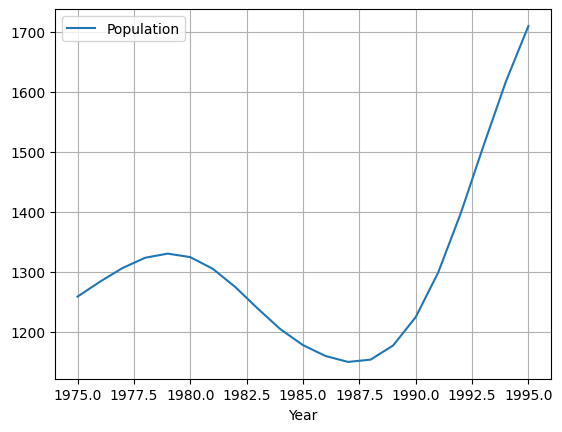

In [37]:
# A guerra se iniciou em 1979 até 1989
# É estimado que mais de 41,951 tenham sido mortos do afeganistão ao longo da guerra

war = df[(df["Year"] >= 1975) & (df["Year"] <= 1995)]

war.plot(x="Year", y="Population", grid=2)

In [36]:
# A partir de 1979 a população começou a decair, decaiu até 1988
# Estranho é q em plena guerra algum estatístico estava coletando essas informações!

war[["Year", "Population"]]

,Year,Population
15,1975,1259.0286
16,1976,1284.0299
17,1977,1306.7538
18,1978,1323.7734
19,1979,1330.6695
20,1980,1324.8370
21,1981,1305.3954
22,1982,1274.9645
23,1983,1238.9269
24,1984,1204.7115


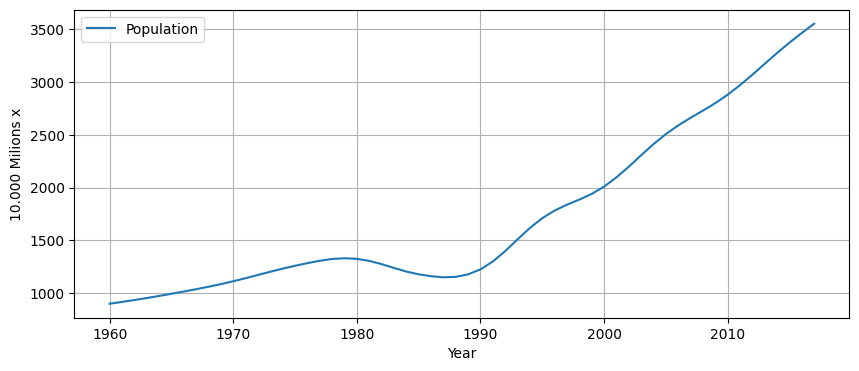

In [23]:
df.plot(
    x="Year", y="Population",
    ylabel="10.000 Milions x",
    grid=2, figsize=(10, 4)
);

In [54]:
df["Year"] = pd.to_datetime(df["Year"], format="%Y")

Para usar a tendencia preciso prever a tendencia.

In [106]:
# Isso ai da erro :(
#stl = STLForecast(
#    df.set_index("Year")["Population"],  
#    ExponentialSmoothing,
#    model_kwargs={"freq": "YS"},
#    period=12,
#).fit()

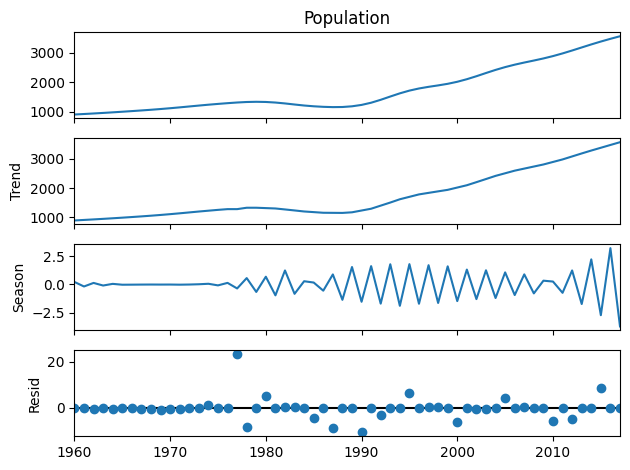

In [107]:
stl = STL(
    df.set_index("Year")["Population"],
    period=2,
    robust=True
).fit()

stl.plot();

In [108]:
df["Trend"] = stl.trend.values

In [109]:
df.tail(5)

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,Trend
53,Afghanistan,AFG,2013-01-01,2.056107e+10,5.600745,127.795223,55.152327,19.591582,3173.1688,3174.910994
54,Afghanistan,AFG,2014-01-01,2.048489e+10,2.724543,133.768367,51.413547,15.782377,3275.8020,3273.565041
55,Afghanistan,AFG,2015-01-01,1.990711e+10,1.451315,132.883209,43.437543,11.687984,3373.6494,3367.966597
56,Afghanistan,AFG,2016-01-01,1.904636e+10,2.260314,138.708666,41.725695,5.933361,3465.6032,3462.358974
57,Afghanistan,AFG,2017-01-01,1.954398e+10,2.665292,145.610741,45.332065,5.904816,3553.0081,3556.750074


In [155]:
lr = sm.OLS(
    df["Population"],
    df["Trend"]
).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Population   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.022e+07
Date:                Tue, 19 Dec 2023   Prob (F-statistic):                   1.96e-151
Time:                        17:26:05   Log-Likelihood:                         -169.44
No. Observations:                  58   AIC:                                      340.9
Df Residuals:                      57   BIC:                                      342.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Trend          1.0000      0.000   3197.354      0.000       0.999       1.001
==============================================================================
Omnibus:                       46.051   Durbin-Watson:                   2.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.616
Skew:                           1.909   Prob(JB):                     1.18e-66
Kurtosis:                      13.538   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para prever a tendencia vou usar o Ano, pois a pop sempre cresce a cada ano!

In [159]:
dfp = df[["y", "Population"]].copy()

dfp["yhat"] = lr.predict()

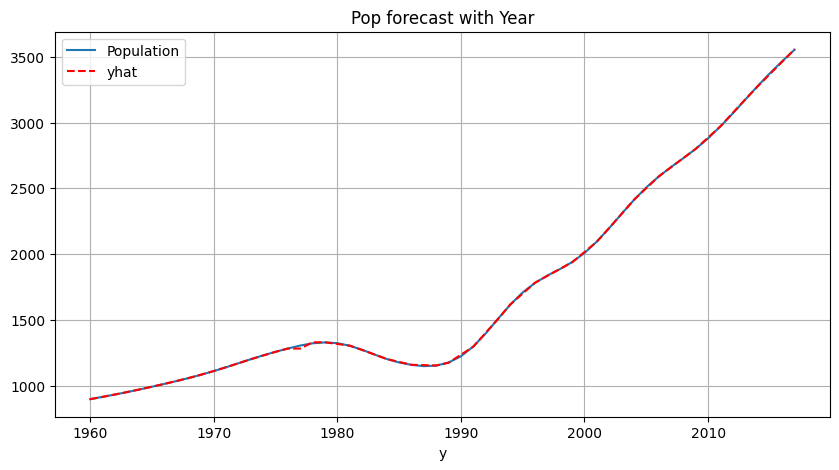

In [161]:
ax = dfp.plot(x="y", y="Population", figsize=(10, 5), title="Pop forecast with Year")
dfp.plot(x="y", y="yhat", grid=2, color="r", linestyle="--", ax=ax);

#### 7. (For advanced readers following on from Section 7.9).